# Vizarts: state of Washington vs Washington cities in the US

## Imports

In [1]:
from pprint import pprint

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely import centroid

The font used for the title: DM Serif Display

https://fonts.google.com/specimen/DM+Serif+Display?query=DM

In [2]:
from matplotlib import font_manager

# Add system fonts so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

In [3]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter/X Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast https://pawjast.substack.com/",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Data - the shape of USA

Source: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [4]:
gdf_shape = gpd.read_file(
    r"..\data\shapes\cb_2018_us_state_5m\cb_2018_us_state_5m.shp"
)

In [5]:
gdf_shape.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

### Convert to Albers contiguous USA

In [6]:
gdf_shape = gdf_shape.to_crs("ESRI:102003")

In [7]:
gdf_shape.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
gdf_shape

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-669722.642 438206.733, -668534.295 ..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-1955187.931 1446310.374, -195..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-1231344.076 -588235.831, -1231015.8..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-633753.012 865532.075, -633164.159 ..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-1000296.509 -570209.147, -999788.64..."
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-2066842.016 -203155.033, -206..."
6,21,01779786,0400000US21,21,KY,Kentucky,00,102279490672,2375337755,"MULTIPOLYGON (((584560.040 -88603.172, 585066...."
7,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((1093838.146 536207.790, 109496..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((761146.204 -748079.090, 761798..."
9,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"POLYGON ((939223.082 -230281.864, 943962.101 -..."


## Data - Washington cities

Some notable cities with "Washington" in the name.

Generated with chatGPT3.5

In [9]:
washingtons = {
    1: {
        "city": "Washington",
        "state": "District of Columbia",
        "wgs84_coordinates": (38.8951, -77.0364)
    },
    2: {
        "city": "Washington",
        "state": "Massachusetts",
        "wgs84_coordinates": (42.5001, -73.1676)
    },
    3: {
        "city": "Washington",
        "state": "Connecticut",
        "wgs84_coordinates": (41.6354, -73.1532)
    },
    4: {
        "city": "Washington",
        "state": "Georgia",
        "wgs84_coordinates": (33.7361, -82.7399)
    },
    5: {
        "city": "Washington",
        "state": "Illinois",
        "wgs84_coordinates": (40.1584, -89.3065)
    },
    6: {
        "city": "Washington",
        "state": "Indiana",
        "wgs84_coordinates": (38.6592, -87.1720)
    },
    7: {
        "city": "Washington",
        "state": "Iowa",
        "wgs84_coordinates": (41.2995, -91.6920)
    },
    8: {
        "city": "Washington",
        "state": "Kansas",
        "wgs84_coordinates": (39.8055, -97.1081)
    },
    9: {
        "city": "Washington",
        "state": "Louisiana",
        "wgs84_coordinates": (30.6010, -92.0860)
    },
    10: {
        "city": "Washington",
        "state": "Maine",
        "wgs84_coordinates": (44.2732, -69.3930)
    },
    11: {
        "city": "Washington",
        "state": "Missouri",
        "wgs84_coordinates": (38.5581, -91.0120)
    },
    12: {
        "city": "Washington",
        "state": "New Hampshire",
        "wgs84_coordinates": (43.1787, -72.0829)
    },
    13: {
        "city": "Washington",
        "state": "New Jersey",
        "wgs84_coordinates": (40.7587, -74.0311)
    },
    14: {
        "city": "Washington",
        "state": "North Carolina",
        "wgs84_coordinates": (35.8293, -77.0552)
    },
    15: {
        "city": "Washington",
        "state": "Ohio",
        "wgs84_coordinates": (41.4562, -81.9174)
    },
    16: {
        "city": "Washington",
        "state": "Oklahoma",
        "wgs84_coordinates": (36.7070, -98.6765)
    },
    17: {
        "city": "Washington",
        "state": "Pennsylvania",
        "wgs84_coordinates": (40.1734, -80.2458)
    },
    18: {
        "city": "Washington",
        "state": "Texas",
        "wgs84_coordinates": (30.2830, -96.1000)
    },
    19: {
        "city": "Washington",
        "state": "Utah",
        "wgs84_coordinates": (37.1305, -113.5083)
    },
    20: {
        "city": "Washington",
        "state": "Vermont",
        "wgs84_coordinates": (44.3068, -72.9919)
    },
    21: {
        "city": "Washington",
        "state": "Virginia",
        "wgs84_coordinates": (38.9072, -77.0369)
    },
    22: {
        "city": "Washington",
        "state": "West Virginia",
        "wgs84_coordinates": (39.2667, -81.5615)
    },
    23: {
        "city": "Washington",
        "state": "Wisconsin",
        "wgs84_coordinates": (43.3708, -88.1894)
    }
}

pprint(washingtons)

{1: {'city': 'Washington',
     'state': 'District of Columbia',
     'wgs84_coordinates': (38.8951, -77.0364)},
 2: {'city': 'Washington',
     'state': 'Massachusetts',
     'wgs84_coordinates': (42.5001, -73.1676)},
 3: {'city': 'Washington',
     'state': 'Connecticut',
     'wgs84_coordinates': (41.6354, -73.1532)},
 4: {'city': 'Washington',
     'state': 'Georgia',
     'wgs84_coordinates': (33.7361, -82.7399)},
 5: {'city': 'Washington',
     'state': 'Illinois',
     'wgs84_coordinates': (40.1584, -89.3065)},
 6: {'city': 'Washington',
     'state': 'Indiana',
     'wgs84_coordinates': (38.6592, -87.172)},
 7: {'city': 'Washington',
     'state': 'Iowa',
     'wgs84_coordinates': (41.2995, -91.692)},
 8: {'city': 'Washington',
     'state': 'Kansas',
     'wgs84_coordinates': (39.8055, -97.1081)},
 9: {'city': 'Washington',
     'state': 'Louisiana',
     'wgs84_coordinates': (30.601, -92.086)},
 10: {'city': 'Washington',
      'state': 'Maine',
      'wgs84_coordinates': (44

### DF cities

In [10]:
df_cities = pd.DataFrame.from_dict(washingtons, orient="index")
df_cities = df_cities[["state", "wgs84_coordinates"]]
df_cities

,state,wgs84_coordinates
1,District of Columbia,"(38.8951, -77.0364)"
2,Massachusetts,"(42.5001, -73.1676)"
3,Connecticut,"(41.6354, -73.1532)"
4,Georgia,"(33.7361, -82.7399)"
5,Illinois,"(40.1584, -89.3065)"
6,Indiana,"(38.6592, -87.172)"
7,Iowa,"(41.2995, -91.692)"
8,Kansas,"(39.8055, -97.1081)"
9,Louisiana,"(30.601, -92.086)"
10,Maine,"(44.2732, -69.393)"


### GDF cities

In [11]:
df_cities["geometry"] = df_cities["wgs84_coordinates"].apply(
    lambda pnt: Point(pnt[1], pnt[0])
)
df_cities

,state,wgs84_coordinates,geometry
1,District of Columbia,"(38.8951, -77.0364)",POINT (-77.0364 38.8951)
2,Massachusetts,"(42.5001, -73.1676)",POINT (-73.1676 42.5001)
3,Connecticut,"(41.6354, -73.1532)",POINT (-73.1532 41.6354)
4,Georgia,"(33.7361, -82.7399)",POINT (-82.7399 33.7361)
5,Illinois,"(40.1584, -89.3065)",POINT (-89.3065 40.1584)
6,Indiana,"(38.6592, -87.172)",POINT (-87.172 38.6592)
7,Iowa,"(41.2995, -91.692)",POINT (-91.692 41.2995)
8,Kansas,"(39.8055, -97.1081)",POINT (-97.1081 39.8055)
9,Louisiana,"(30.601, -92.086)",POINT (-92.086 30.601)
10,Maine,"(44.2732, -69.393)",POINT (-69.393 44.2732)


In [12]:
gdf_cities = gpd.GeoDataFrame(
    data=df_cities["state"],
    crs="EPSG:4326",
    geometry=df_cities["geometry"]
)
gdf_cities

,state,geometry
1,District of Columbia,POINT (-77.03640 38.89510)
2,Massachusetts,POINT (-73.16760 42.50010)
3,Connecticut,POINT (-73.15320 41.63540)
4,Georgia,POINT (-82.73990 33.73610)
5,Illinois,POINT (-89.30650 40.15840)
6,Indiana,POINT (-87.17200 38.65920)
7,Iowa,POINT (-91.69200 41.29950)
8,Kansas,POINT (-97.10810 39.80550)
9,Louisiana,POINT (-92.08600 30.60100)
10,Maine,POINT (-69.39300 44.27320)


In [13]:
gdf_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Convert to the same CRS as the map

In [14]:
gdf_cities = gdf_cities.to_crs("ESRI:102003")
gdf_cities

,state,geometry
1,District of Columbia,POINT (1618666.238 318404.450)
2,Massachusetts,POINT (1847009.719 783003.371)
3,Connecticut,POINT (1871180.731 689346.260)
4,Georgia,POINT (1216029.399 -336322.793)
5,Illinois,POINT (564704.396 317833.996)
6,Indiana,POINT (759913.349 165246.447)
7,Iowa,POINT (357833.923 433848.513)
8,Kansas,POINT (-94022.328 258945.434)
9,Louisiana,POINT (374387.625 -762962.860)
10,Maine,POINT (2090222.508 1052523.828)


In [15]:
gdf_cities.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Plot the data

### Filters

In [16]:
usa_continental = ~gdf_shape["NAME"].isin(
    [
        "Hawaii", "Alaska", "Puerto Rico", "American Samoa", "United States Virgin Islands",
        "Commonwealth of the Northern Mariana Islands", "Guam"
    ]
)
washington_state = gdf_shape["NAME"].isin(["Washington"])

### Settings

In [17]:
plt.rcParams.update(
    {
        "font.family": "Roboto",
        "font.size": 18,
    }
)

### Add annotation func

In [18]:
def make_annotation(gdf, ax, xy=(0.5, 0.5), add_text=None, text_colour="black") -> None:
    temp = gdf["geometry"].copy()
    if isinstance(gdf["geometry"].iloc[0], Point):
        xy_val = (
            gdf["geometry"].values[0].xy[0][0],
            gdf["geometry"].values[0].xy[1][0],
        )
    else:
        xy_val = (
            centroid(temp).values[0].xy[0][0],
            centroid(temp).values[0].xy[1][0],
        )

    ax.annotate(
        text=f"{add_text}",
        xy=xy_val,
        xycoords="data",
        xytext=xy,
        textcoords=ax.transAxes,
        color=text_colour,
        arrowprops=dict(
            arrowstyle="-",
            connectionstyle="arc3,rad=-0.2",
            shrinkA=5, 
            shrinkB=5,
            color=text_colour
        )
    )

### Plot

Text(1, -0.06, 'by @pawjast\nmade with @matplotlib and @geopandas♥')

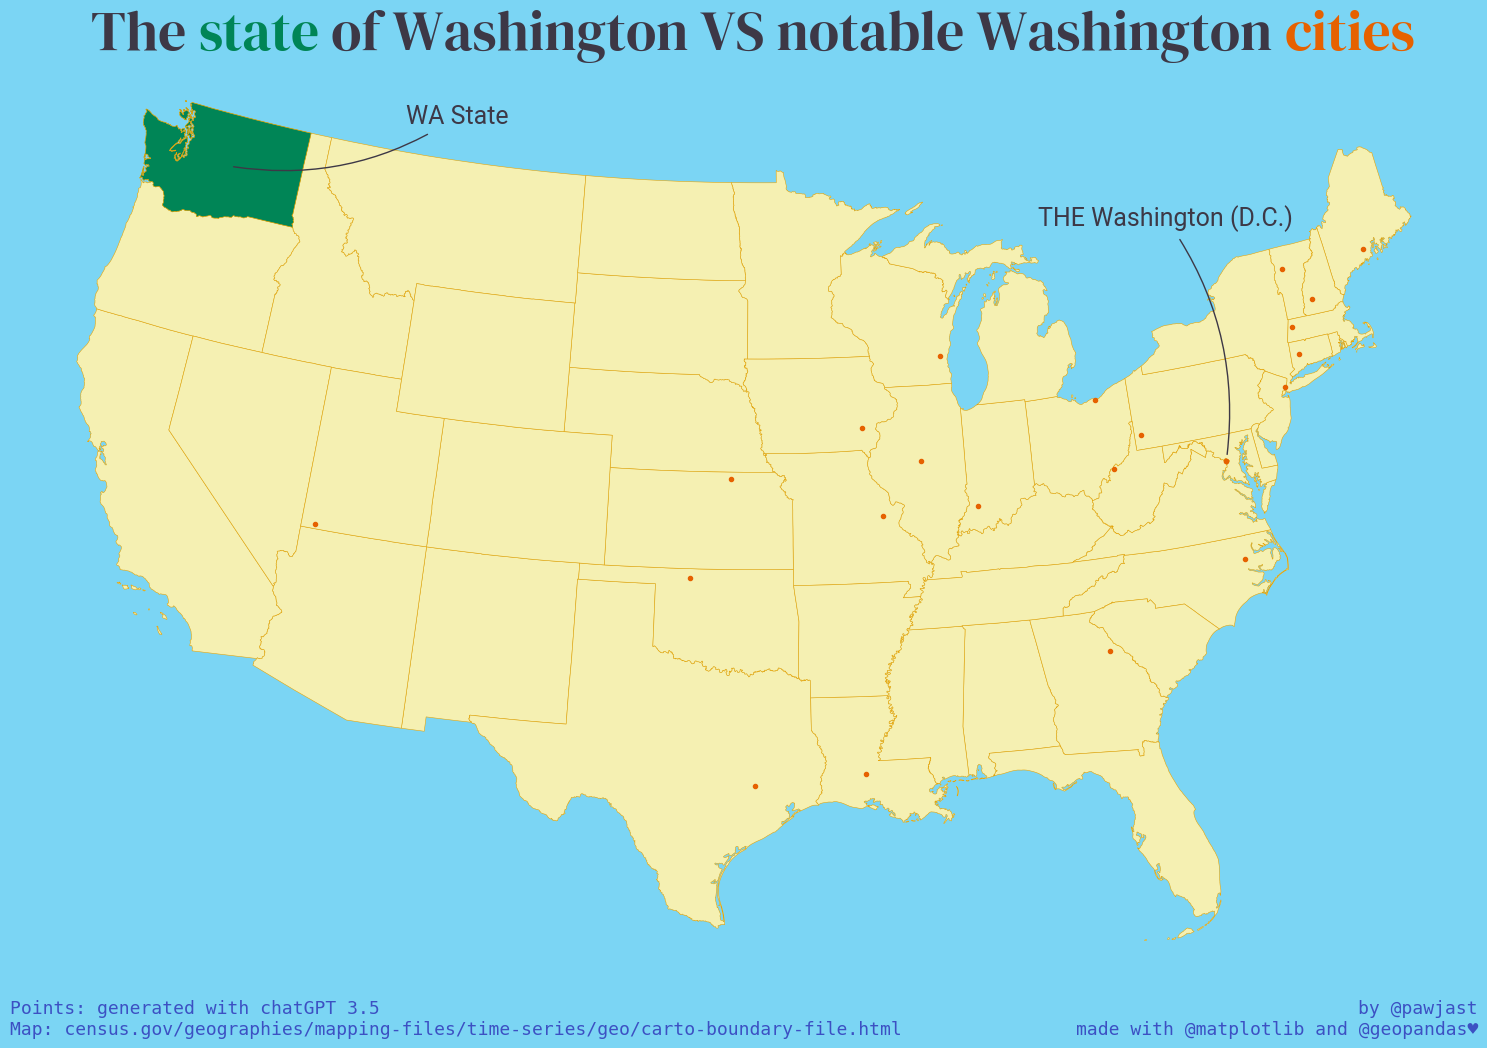

In [19]:
# Shape of the USA
ax = gdf_shape.loc[usa_continental].plot(
    figsize=(20, 12),
    lw=0.4,
    edgecolor="#e5a50a",
    facecolor="#f5f0b2",
)

fig = plt.gcf()
fig.set_facecolor("#7bd5f4")  # blue-ish

# Highlight state of Washington
gdf_shape.loc[washington_state].plot(
    ax=ax,
    lw=0.4,
    edgecolor="#e5a50a",
    facecolor="#008556"
)

# Plot Washington cities
gdf_cities.plot(
    ax=ax,
    marker=".",
    markersize=35,
    facecolor="#e66100",
    label="Cities named Washington"
)

ax.set_axis_off()
# Title
# Use `text` as a suptitle
txt = ax.text(
    0.055, 1.01,
    "The ",
    fontfamily="DM Serif Display",
    fontsize=40,
    color="#3d3846",
    transform = ax.transAxes
)
txt = ax.annotate(
    "state",
    xycoords=txt,
    xy=(1, 0),
    fontfamily="DM Serif Display",
    fontsize=40,
    verticalalignment="bottom",
    color="#008556"
)
txt = ax.annotate(
    " of Washington VS notable Washington ",
    xycoords=txt,
    xy=(1, 0),
    fontfamily="DM Serif Display",
    fontsize=40,
    verticalalignment="bottom",
    color="#3d3846"
)
txt = ax.annotate(
    "cities",
    xycoords=txt,
    xy=(1, 0),
    fontfamily="DM Serif Display",
    fontsize=40,
    verticalalignment="bottom",
    color="#e66100"
)

# Annotations
make_annotation(
    gdf=gdf_cities.loc[gdf_cities["state"] == "District of Columbia"],
    ax=ax,
    xy=(0.7, 0.82),
    add_text="THE Washington (D.C.)",
    text_colour="#3d3846"
)
make_annotation(
    gdf=gdf_shape.loc[washington_state],
    ax=ax,
    xy=(0.27, 0.93),
    add_text="WA State",
    text_colour="#3d3846"
)

# Footer
ax.text(
    0.0, -0.06,
    "Points: generated with chatGPT 3.5\nMap: census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html",
    transform = ax.transAxes,
    horizontalalignment="left",
    verticalalignment="bottom",
    color="#3c50c3",
    fontsize=13,
    family="monospace",
    weight="medium"
)
ax.text(
    1, -0.06,
    "by @pawjast\nmade with @matplotlib and @geopandas\u2665",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#3c50c3",
    fontsize=13,
    family="monospace",
    weight="medium"
)

# plt.savefig(
#     fname="washington_state_vs_cities.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict,
#     bbox_inches="tight"
# );
